<a href="https://colab.research.google.com/github/agargi007/PDS/blob/main/SKILL_experiment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Binary classification: High (1) or Low (0) house value
threshold = df['median_house_value'].median()
df['Price_Category'] = (df['median_house_value'] > threshold).astype(int)

X = df.drop(['median_house_value', 'Price_Category'], axis=1)
y = df['Price_Category']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("📌 Random Forest Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


📌 Random Forest Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       310
           1       0.83      0.80      0.81       290

    accuracy                           0.82       600
   macro avg       0.83      0.82      0.82       600
weighted avg       0.83      0.82      0.82       600

Confusion Matrix:
 [[264  46]
 [ 59 231]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


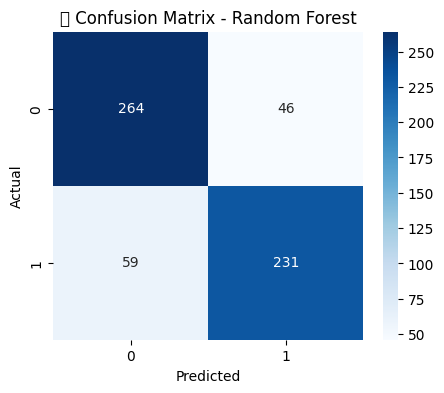

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title("📊 Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
adb = AdaBoostClassifier(n_estimators=100, random_state=42)
adb.fit(X_train, y_train)
adb_pred = adb.predict(X_test)
print("📌 AdaBoost Report:\n", classification_report(y_test, adb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, adb_pred))


📌 AdaBoost Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       310
           1       0.81      0.79      0.80       290

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600

Confusion Matrix:
 [[258  52]
 [ 62 228]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


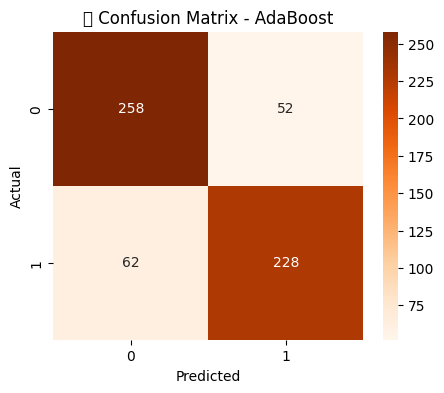

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, adb_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("📊 Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("📌 Gradient Boosting Report:\n", classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))


📌 Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       310
           1       0.84      0.82      0.83       290

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600

Confusion Matrix:
 [[264  46]
 [ 53 237]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


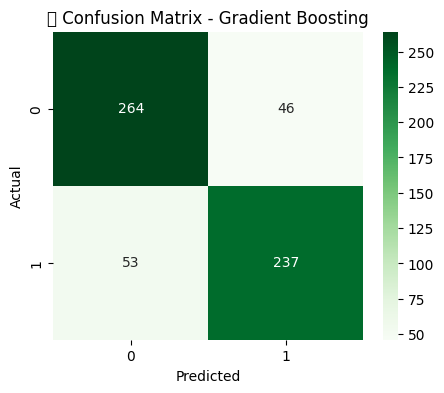

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Greens')
plt.title("📊 Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
logreg = LogisticRegression()
voting = VotingClassifier(estimators=[
    ('lr', logreg),
    ('rf', rf),
    ('gb', gb)
], voting='hard')

voting.fit(X_train, y_train)
vote_pred = voting.predict(X_test)
print("📌 Voting Classifier Report:\n", classification_report(y_test, vote_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, vote_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📌 Voting Classifier Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       310
           1       0.84      0.81      0.83       290

    accuracy                           0.83       600
   macro avg       0.84      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600

Confusion Matrix:
 [[266  44]
 [ 55 235]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


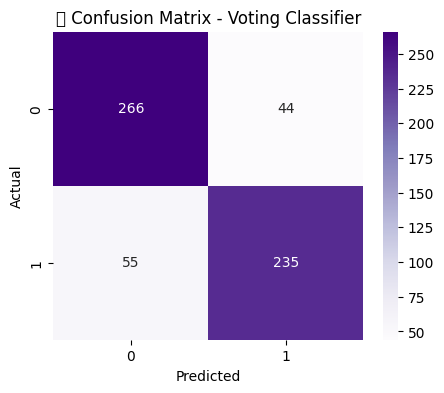

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, vote_pred), annot=True, fmt='d', cmap='Purples')
plt.title("📊 Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
